<a href="https://colab.research.google.com/github/aidanandrucyk/Machine_Learning_Predictor_for_New_York_City_Airbnb_Prices/blob/master/ML_King_County_Housing_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KING COUNTY HOUSING PRICE PREDICTOR
----
-----
**Aidan Matthew Andrucyk | July, 2020 | Machine Learning Project**
<p>This dataset contains house sale prices for King County, WA. It includes homes sold between May 2014 and May 2015.</p>
----
-----

## FEATURE DESCRIPTIONS
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Column</th>
      <th>Variable</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>price</td>
      <td>Sale price of the house.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>bedrooms</td>
      <td>Number of bedrooms.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>bathrooms</td>
      <td>Number of bathrooms.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>sqft__ving</td>
      <td>Size of living area in square feet.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>sqft_lot</td>
      <td>Size of the lot in square feet.</td>
    </tr>
    <tr>
      <th>5</th>
      <td>floors</td>
      <td>Number of floors.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>waterfront</td>
      <td>‘1’ if the property has a waterfront, ‘0’ if not.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>view</td>
      <td>An index from 0 to 4 of how good the view of the property was.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>condition</td>
      <td>An index from 1 to 5 on the condition of the apartment.</td>
    </tr>
    <tr>
      <th>9</th>
      <td>grade</td>
      <td>An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>sqft_above</td>
      <td>The square footage of the interior housing space that is above ground level.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>sqft_basement </td>
      <td>The square footage of the interior housing space that is below ground level.</td>
    </tr>
    <tr>
      <th>12</th>
      <td>yr_built</td>
      <td>The year the house was initially built.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>yr_renovated</td>
      <td>The year of the house’s last renovation.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>zipcode</td>
      <td>What zipcode area the property is in.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>lat</td>
      <td>Lattitude.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>long</td>
      <td>Longitude.</td>
    </tr>
        <tr>
      <th>17</th>
      <td>sqft_living15</td>
      <td>The square footage of interior housing living space for the nearest 15 neighbors.</td>
    </tr>
        <tr>
      <th>18</th>
      <td>sqft_lot15</td>
      <td>The square footage of the land lots of the nearest 15 neighbors</td>
    </tr>
  </tbody>
</table>

---
----
## Resources
- [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction)

- [Data Source](https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/)

## Regional Map

Red section represents the City of Seattle.

Orange section represents King County

![Map Outline of King County](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/King_County_Washington_Incorporated_and_Unincorporated_areas_Burien_Highlighted.svg/1200px-King_County_Washington_Incorporated_and_Unincorporated_areas_Burien_Highlighted.svg.png)


# ESTABLISH TOOLS

In [284]:
"""
IMPORT LIBRARIES
"""
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.1)

import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls

# Map Coordinates
import requests
import urllib.parse

In [285]:
"""
UPLOAD FROM KAGGLE
"""
# install dependencies
!pip install kaggle
# check if Kaggle is installed
!mkdir .kaggle
# importing from Kaggle
from google.colab import files 
# must temporarily suspend NoScript if installed
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change permisssion
!chmod 600 ~/.kaggle/kaggle.json
# download data set using Kaggle API command
!kaggle datasets download -d harlfoxem/housesalesprediction
# import zip
from zipfile import ZipFile
file_name = "housesalesprediction.zip"
# extract zip
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('CSV Downloaded via Kaggle API command')

mkdir: cannot create directory ‘.kaggle’: File exists


Saving kaggle.json to kaggle (1).json
housesalesprediction.zip: Skipping, found more recently modified local copy (use --force to force download)
CSV Downloaded via Kaggle API command


# EXPLORATORY DATA ANALYSIS

In [357]:
# [KAGGLE] df = pd.read_csv('housesalesprediction.csv')
# read csv from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/aidanandrucyk/Machine_Learning_Predictor_for_New_York_City_Airbnb_Prices/master/kc_house_data.csv',  error_bad_lines=False)

In [358]:
df.head(10)

id        date      price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014   221900.0  ... -122.257           1340        5650
1  6414100192   12/9/2014   538000.0  ... -122.319           1690        7639
2  5631500400   2/25/2015   180000.0  ... -122.233           2720        8062
3  2487200875   12/9/2014   604000.0  ... -122.393           1360        5000
4  1954400510   2/18/2015   510000.0  ... -122.045           1800        7503
5  7237550310   5/12/2014  1230000.0  ... -122.005           4760      101930
6  1321400060   6/27/2014   257500.0  ... -122.327           2238        6819
7  2008000270   1/15/2015   291850.0  ... -122.315           1650        9711
8  2414600126   4/15/2015   229500.0  ... -122.337           1780        8113
9  3793500160   3/12/2015   323000.0  ... -122.031           2390        7570

[10 rows x 21 columns]

In [359]:
# check to see if there is any missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

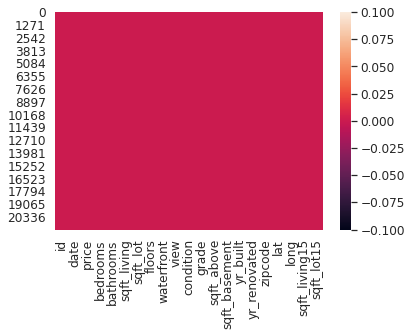

In [360]:
sns.heatmap(df.isnull()) # no mising data

In [361]:
df.describe().transpose()

count          mean  ...           75%           max
id             21597.0  4.580474e+09  ...  7.308900e+09  9.900000e+09
price          21597.0  5.402966e+05  ...  6.450000e+05  7.700000e+06
bedrooms       21597.0  3.373200e+00  ...  4.000000e+00  3.300000e+01
bathrooms      21597.0  2.115826e+00  ...  2.500000e+00  8.000000e+00
sqft_living    21597.0  2.080322e+03  ...  2.550000e+03  1.354000e+04
sqft_lot       21597.0  1.509941e+04  ...  1.068500e+04  1.651359e+06
floors         21597.0  1.494096e+00  ...  2.000000e+00  3.500000e+00
waterfront     21597.0  7.547345e-03  ...  0.000000e+00  1.000000e+00
view           21597.0  2.342918e-01  ...  0.000000e+00  4.000000e+00
condition      21597.0  3.409825e+00  ...  4.000000e+00  5.000000e+00
grade          21597.0  7.657915e+00  ...  8.000000e+00  1.300000e+01
sqft_above     21597.0  1.788597e+03  ...  2.210000e+03  9.410000e+03
sqft_basement  21597.0  2.917250e+02  ...  5.600000e+02  4.820000e+03
yr_built       21597.0  1.971000e+03  ...  1.997000e+03  2.015000e+03
yr_renovated   21597.0  8.446479e+01  ...  0.000000e+00  2.015000e+03
zipcode        21597.0  9.807795e+04  ...  9.811800e+04  9.819900e+04
lat            21597.0  4.756009e+01  ...  4.767800e+01  4.777760e+01
long           21597.0 -1.222140e+02  ... -1.221250e+02 -1.213150e+02
sqft_living15  21597.0  1.986620e+03  ...  2.360000e+03  6.210000e+03
sqft_lot15     21597.0  1.275828e+04  ...  1.008300e+04  8.712000e+05

[20 rows x 8 columns]

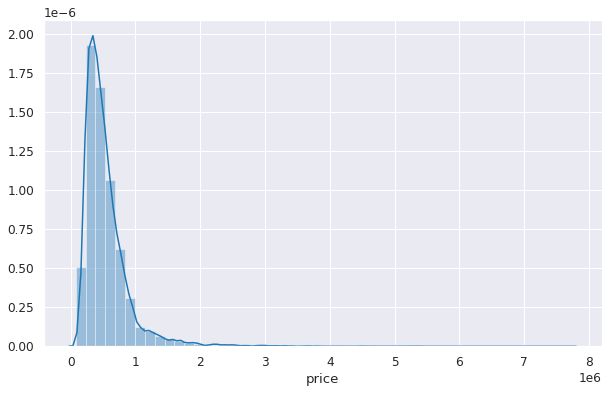

In [362]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'], bins=50)

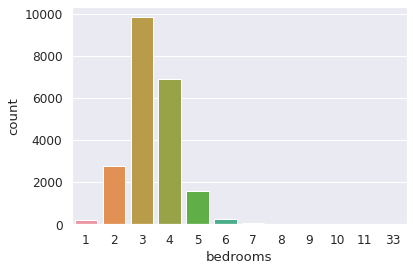

In [363]:
sns.countplot(df['bedrooms'])

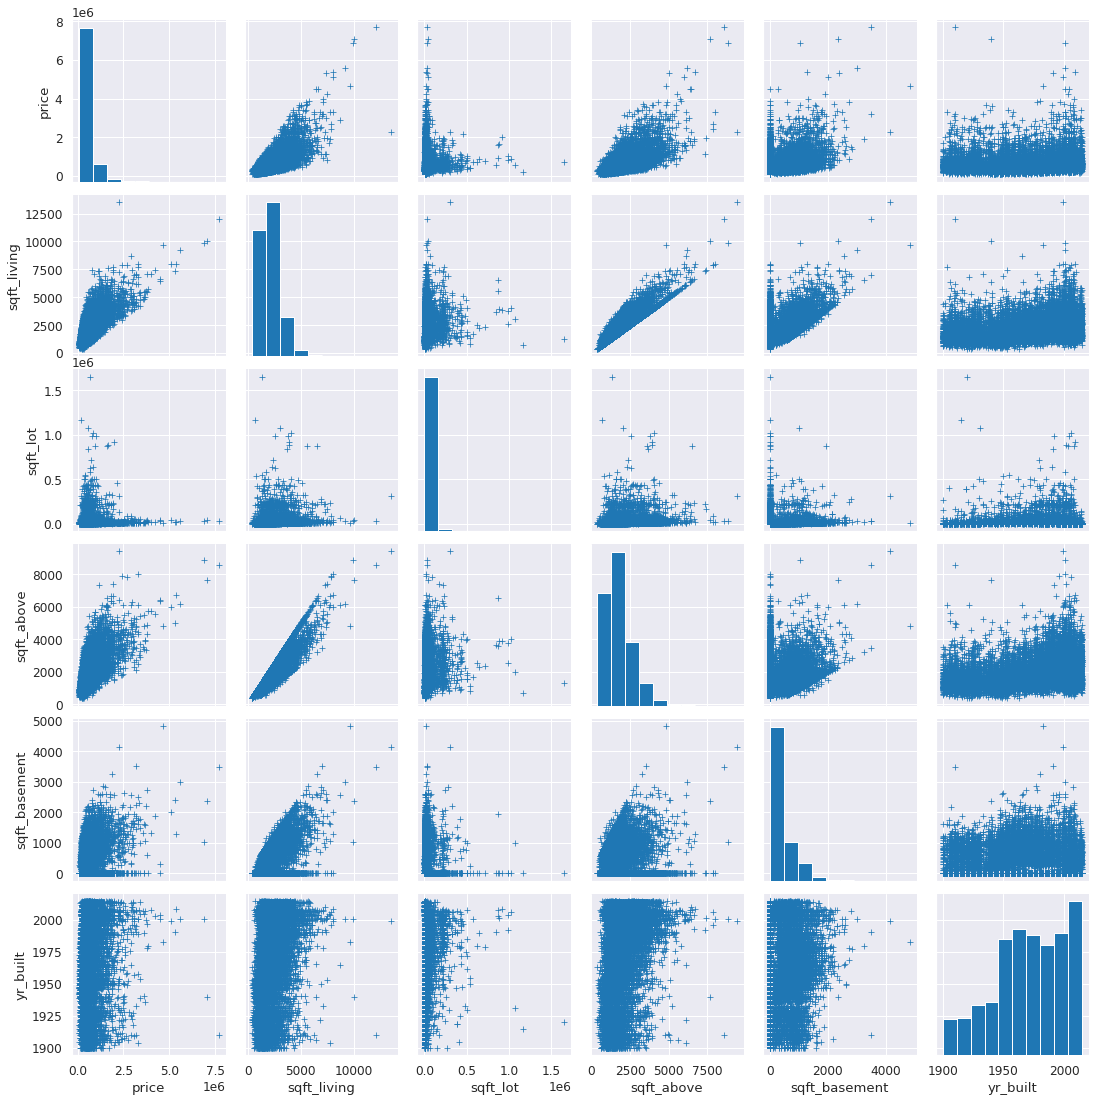

In [364]:
# pairplot of continuous variables
sns.pairplot(data=df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']], markers='+')

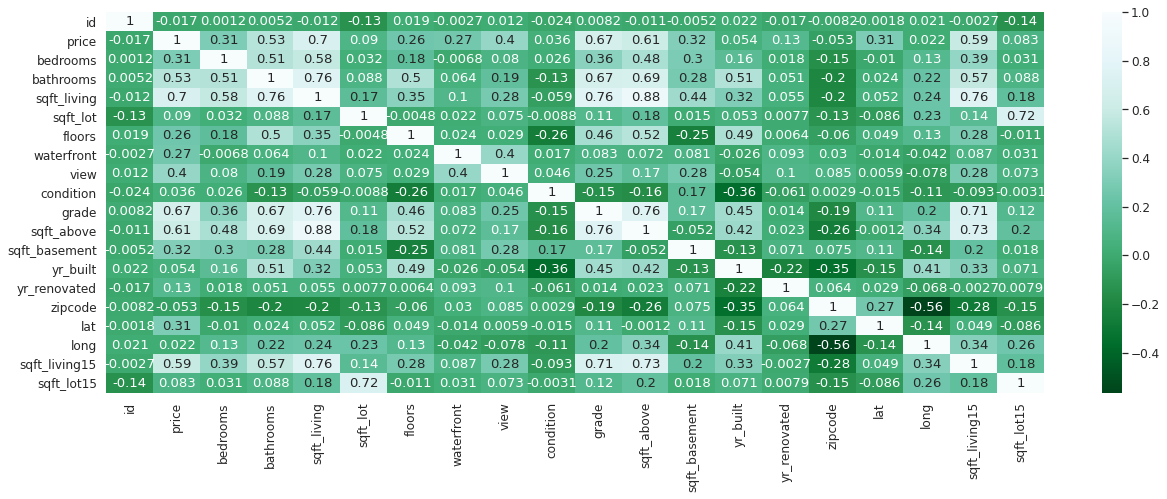

In [365]:
plt.figure(figsize=(21,7))
sns.heatmap(df.corr(), annot=True, cmap='BuGn_r')

In [366]:
df.corr()['price'].sort_values(ascending=False) # sqft_living seems to have the greatest correlation

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

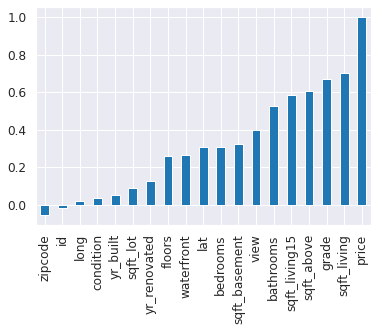

In [367]:
df.corr()['price'][:-1].sort_values(ascending=True).plot(kind='bar')

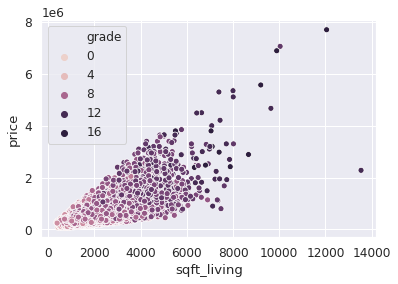

In [368]:
sns.scatterplot(x='sqft_living', y='price', data=df, hue='grade')

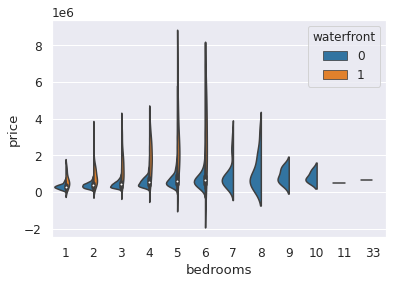

In [369]:
sns.violinplot(x='bedrooms', y='price', data=df, hue='waterfront', split=True)

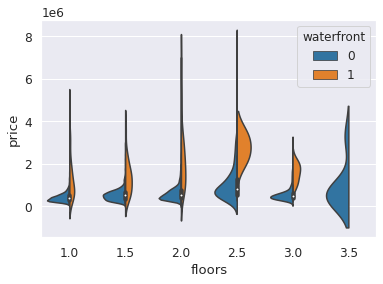

In [370]:
sns.violinplot(x='floors', y='price', data=df, hue='waterfront', split=True)

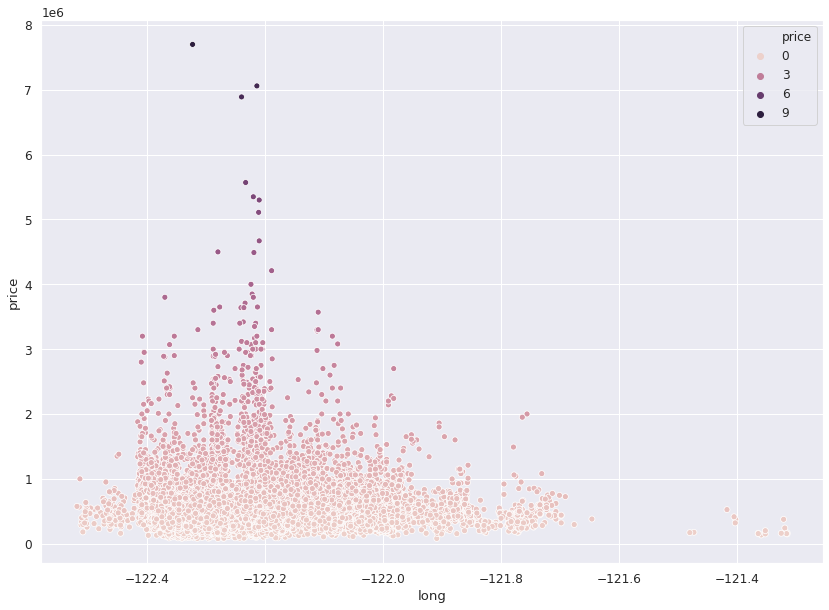

In [371]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='long',y='price',data=df, hue='price', markers='+')
# houses in the western regions appear to sell for higher prices

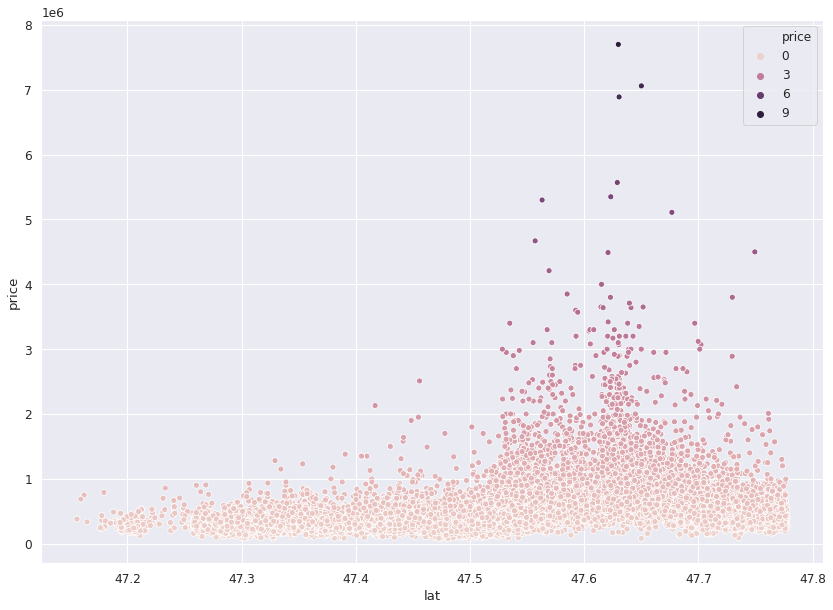

In [372]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='lat',y='price',data=df, hue='price')
# houses in the northern regions appear to sell for higher prices

'\nThe color differential is not clear due to outliers (extreme sale prices). \nThe waterfront properties and Seattle area appear to sell for higher prices. \nThe greater quantity of sales in the western regions reflect population density and land allocation. \n'

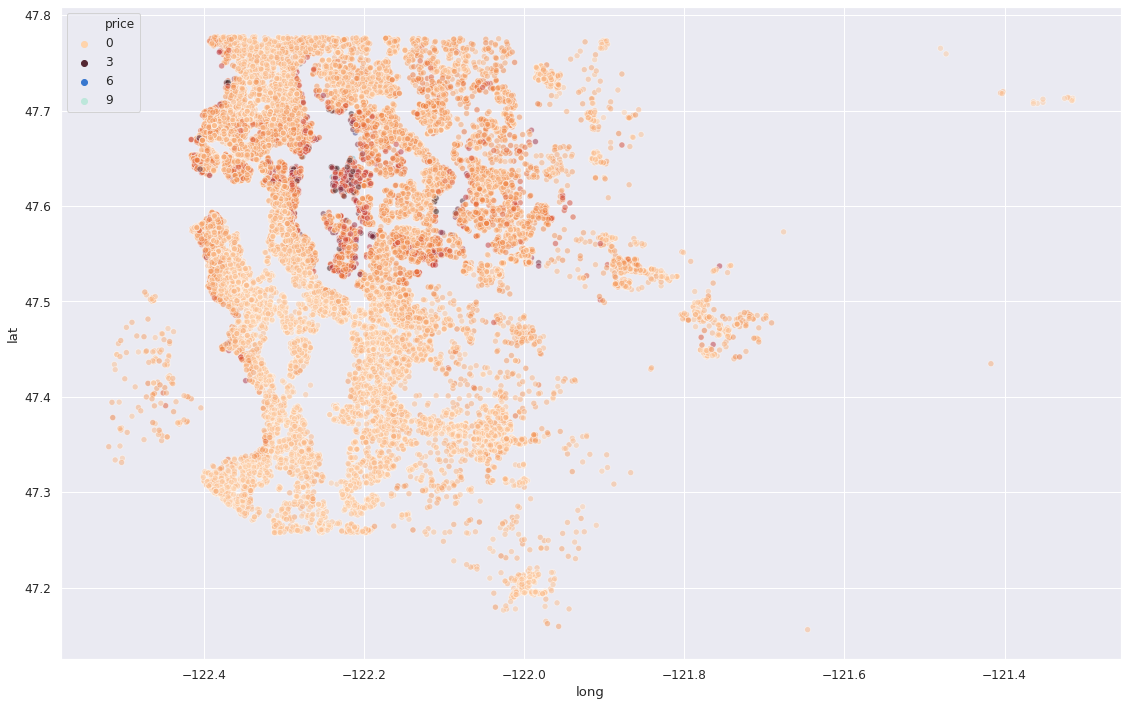

In [373]:
# scatterplot that resembles that shape of King County by taking longitude and latitude with a hue of price
plt.figure(figsize=(19,12))
sns.scatterplot(x='long', y='lat', data=df, hue ='price', alpha=.5, palette='icefire_r')
"""
The color differential is not clear due to outliers (extreme sale prices). 
The waterfront properties and Seattle area appear to sell for higher prices. 
The greater quantity of sales in the western regions reflect population density and land allocation. 
"""

**King County Visualizations**


![King County](https://aqua.kingcounty.gov/gis/web/Web/VMC/pubhealth/05070_hpa_zipbase.gif)

![King County Land Allocation](https://www.kingcounty.gov/~/media/services/gis/map-previews/generalized-landuse.ashx?h=582&w=868&la=en&as=1)

![Washington Density](https://external-preview.redd.it/mtwAPI7wVMEYp5rjcVBcEFKhpA25wtre-7snbPncAJY.png?auto=webp&s=8ca74cc7efa976b5e33da4c53df3fa23eba80905)

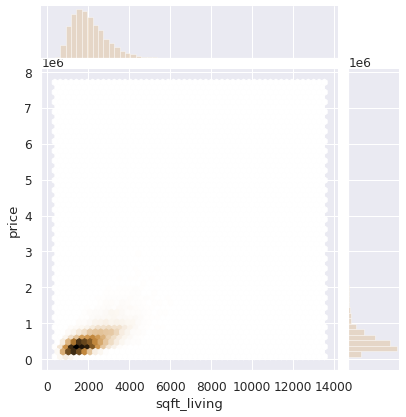

In [374]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='hex', color='burlywood', )
# outliers are stretching automatically generating frame limits, highlighting how concentrated the data set is

## Removing outliers
outliers in price seem to intuitively skew data towards extreme values 

In [375]:
# Interinterquartile range (IQR) of Price = difference between 75th and 25th percentiles = Q3 − Q1
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
iqr

323000.0

In [376]:
# outliers = less than Q1 – 1.5×IQR or greater than Q3 + 1.5×IQR
df = df[(df['price'] < (1.5*iqr + df['price'].quantile(0.75))) & (df['price'] > (df['price'].quantile(0.25)-(1.5*iqr)))]

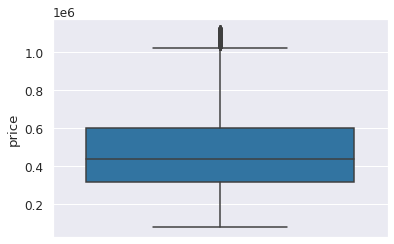

In [377]:
sns.boxplot(y='price', data=df)

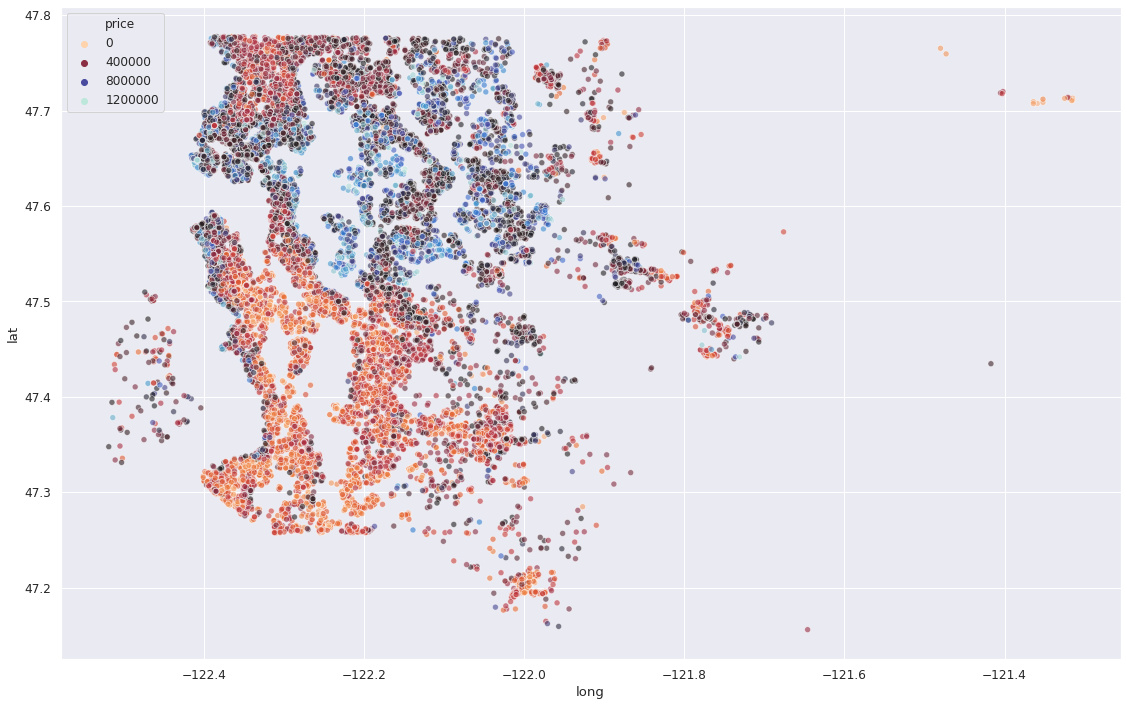

In [378]:
# map is now much clearer in distinguising between prices
plt.figure(figsize=(19,12))
sns.scatterplot(x='long', y='lat', data=df, hue ='price', alpha=.6, palette='icefire_r')

Alternative to removing outliers
```
# remove top 1% of prices
df = df.sort_values('price', ascending=False).iloc[int(len(df)*.01):]
```



# FEATURE ENGINEERING

In [379]:
# ID is redundant due to index
df.drop('id', axis=1, inplace=True)

## Convering String Date to Integers

In [380]:
# convert data string to date type
df['date'] = pd.to_datetime(df['date'])
# create year and month columns using a lambda expression to extract the respective time stamp 
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
# remove date column
df.drop('date', axis=1, inplace=True)

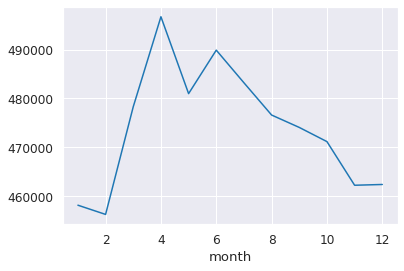

In [381]:
# get average price by month
# display(df.groupby('month', sort=True).mean()['price'])
display(df.groupby('month', sort=True).mean()['price'].plot())

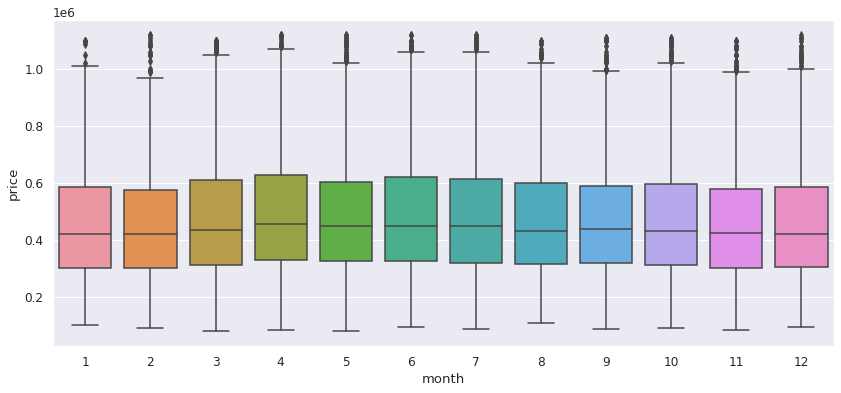

In [382]:
plt.figure(figsize=(14,6))
sns.boxplot(x='month', y= 'price' , data=df)

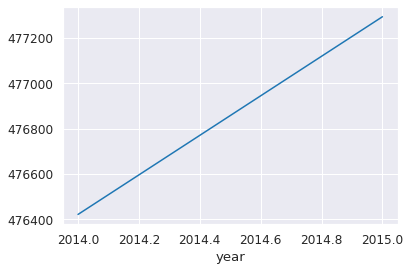

In [383]:
# get average price by year
# display(df.groupby('year', sort=True).mean()['price'])
display(df.groupby('year', sort=True).mean()['price'].plot())
# constant increase makes intuitive logical sense given inflation

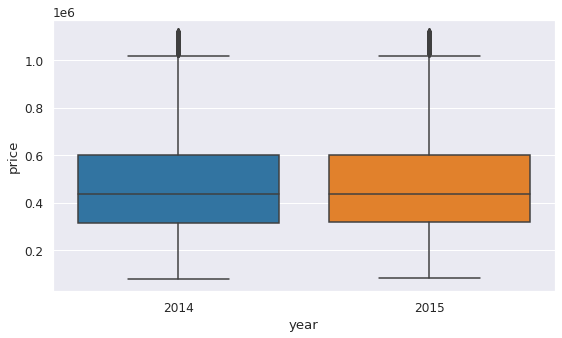

In [384]:
plt.figure(figsize=(9,5))
sns.boxplot(x='year', y= 'price', data=df)

## Cleaning year zero renovations

In [385]:
df.head(1)

price  bedrooms  bathrooms  ...  sqft_lot15  year  month
0  221900.0         3        1.0  ...        5650  2014     10

[1 rows x 21 columns]

In [386]:
df['yr_renovated'].value_counts() 
# zero suggests that the house was not renovated

0       19673
2014       82
2013       34
2000       30
2007       29
        ...  
1956        1
1948        1
1944        1
1934        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [387]:
df['yr_renovated'].value_counts()
# year renovated of 0 indicates that the property has never been renovated since it was built

0       19673
2014       82
2013       34
2000       30
2007       29
        ...  
1956        1
1948        1
1944        1
1934        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [388]:
# convert 0 year renovated to year built
df['yr_renovated'] = np.where(df['yr_renovated'] == 0, df['yr_built'] , df['yr_renovated'])
df['yr_renovated'].value_counts()

2014    593
2005    450
2006    428
2004    426
2003    419
       ... 
1901     27
1902     23
1933     18
1935     17
1934     14
Name: yr_renovated, Length: 116, dtype: int64

## make zipcode catergorical

In [389]:
# zipcode is not helpful as numerical data since there is no clear marginal pattern.
# It is therefore better to be treated as catergorical data
display(df['zipcode'].value_counts())
dummies = pd.get_dummies(df['zipcode'], drop_first=True)
df = pd.concat([df.drop('zipcode', axis=1), dummies], axis=1)
df.columns
# that should be all engineering that need be performed

98103    588
98038    586
98052    563
98115    558
98042    547
        ... 
98102     88
98109     86
98024     73
98148     57
98039      6
Name: zipcode, Length: 70, dtype: int64

Index([        'price',      'bedrooms',     'bathrooms',   'sqft_living',
            'sqft_lot',        'floors',    'waterfront',          'view',
           'condition',         'grade',    'sqft_above', 'sqft_basement',
            'yr_built',  'yr_renovated',           'lat',          'long',
       'sqft_living15',    'sqft_lot15',          'year',         'month',
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,  

In [412]:
# number of variables
len(df.columns)

89

0 indicates there is no basement. As a continouos variable, this still makes sense.

# NEURAL NETWORK

In [390]:
"""IMPORTING MACHINE LEARNING ASSETS"""
# for splitting data into train and test sets 
from sklearn.model_selection import train_test_split
# for scaling data
from sklearn.preprocessing import MinMaxScaler
# loads extension for Tensboard
%load_ext tensorboard
# 
import datetime, os
# machine learning libary
import tensorflow as tf
# modeling type
from tensorflow.keras.models import Sequential
# adding layers to model
from tensorflow.keras.layers import Dense, Dropout
# call backs
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [391]:
# .values returns a numpy array
X = df.drop('price', axis=1).values 
y = df['price'].values

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [393]:
# create new instance of min/max scaler
scaler = MinMaxScaler()
# fits AND transforms at the same time for train set
X_train = scaler.fit_transform(X_train)
# ONLY transform test set since we do not want our model to be fitted to our test data
X_test = scaler.transform(X_test)

In [394]:
X_train.shape

(14307, 88)

Since there are 19 predictor variables in our data set, it is generally good practice to create 19 neurons for our model.

In [395]:
model = Sequential()
model.add(Dense(19, activation='relu'))

model.add(Dense(19, activation='relu'))
# 40% of neurons are turn off (weights & baises are not updated)
model.add(Dropout(.4))

model.add(Dense(19, activation='relu'))
# 40% of neurons are turn off (weights & baises are not updated)
model.add(Dropout(.4))

# final output price
model.add(Dense(1))

# compile model
model.compile(optimizer='adam', loss='mse')

In [396]:
early_stop = EarlyStopping(monitor='val_loss', 
                          # we want to minimize val_loss
                          mode='min', 
                          # account for noise
                          patience=8,
                          # report
                          verbose = 1) 

# tensorboard
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")),
                                             histogram_freq=1,
                                             write_graph=True,
                                             write_images=True,
                                             profile_batch=2,
                                             embeddings_freq=1)

In [397]:
model.fit(x=X_train, y=y_train,
          # validation_data checks for each iteration how our loss is for each property (does not affect the baises)
          validation_data=(X_test, y_test),
          # using a batch size due to large data set (smaller = takes longer + less likely to overfit)
          batch_size = 128,
          # arbitraly large value to be corrected by callback
          epochs=10000,
          # stops when val_loss begins to increase for patience of 8 calls
          callbacks=[early_stop, tensorboard])

Epoch 1/10000
112/112 [==============================] - 0s 4ms/step - loss: 270628454400.0000 - val_loss: 269892681728.0000
Epoch 2/10000
112/112 [==============================] - 0s 3ms/step - loss: 270413725696.0000 - val_loss: 269280182272.0000
Epoch 3/10000
112/112 [==============================] - 0s 3ms/step - loss: 268649316352.0000 - val_loss: 265784967168.0000
Epoch 4/10000
112/112 [==============================] - 0s 3ms/step - loss: 262121308160.0000 - val_loss: 255333793792.0000
Epoch 5/10000
112/112 [==============================] - 0s 3ms/step - loss: 246339731456.0000 - val_loss: 233420767232.0000
Epoch 6/10000
112/112 [==============================] - 0s 3ms/step - loss: 217729236992.0000 - val_loss: 197644533760.0000
Epoch 7/10000
112/112 [==============================] - 0s 3ms/step - loss: 177599873024.0000 - val_loss: 151154229248.0000
Epoch 8/10000
112/112 [==============================] - 0s 3ms/step - loss: 131512827904.0000 - val_loss: 102974210048.0000


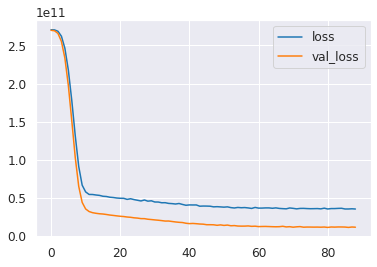

In [398]:
# can directly compare loss on training set and loss on test set (val data) to check that the model is not overfitted
pd.DataFrame(model.history.history).plot()

In [399]:
# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  1691      
_________________________________________________________________
dense_9 (Dense)              multiple                  380       
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  380       
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_11 (Dense)             multiple                  20        
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
____________________________________________________

In [400]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [401]:
predictions = model.predict(X_test)

In [402]:
# MAE
mean_absolute_error(y_test, predictions)

77209.66575125877

In [403]:
# MSE
mean_squared_error(y_test, predictions)

11542813410.60065

In [404]:
# RMSE
np.sqrt(mean_squared_error(y_test, predictions))

107437.48605864086

In [405]:
df['price'].describe()

count    2.043900e+04
mean     4.767026e+05
std      2.077903e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.120000e+06
Name: price, dtype: float64

In [406]:
explained_variance_score(y_test, predictions)

0.7852845111769764

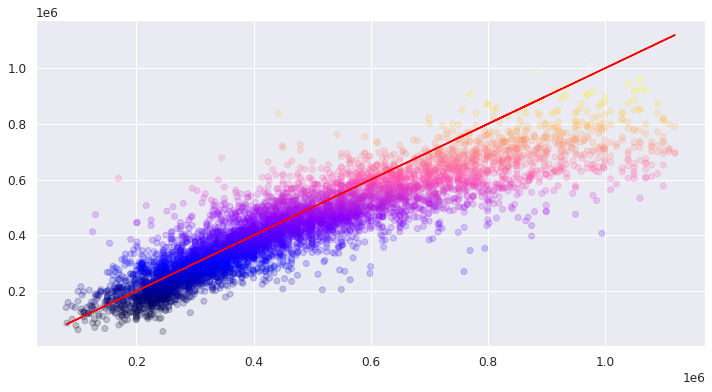

In [407]:
plt.figure(figsize=(12,6))
# create scatterplot of 
plt.scatter(y_test, predictions, c=predictions, alpha=.2, cmap='gnuplot2')
# plotting linear regression of test data in red 
plt.plot(y_test,y_test, 'r')
# although it seems like a logrithmic model may serve as a better line of fit, most of the data clusters at the lower prices

Seems like the model can explain most of the data well (but not the outliers)

[]

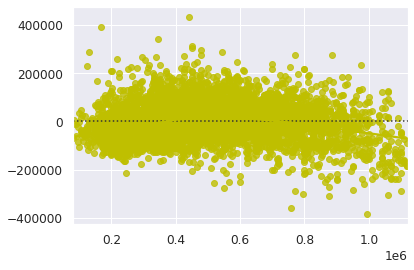

In [408]:
# residual plot
sns.residplot(x=y_test,
              y=predictions,
              lowess=True, 
              color="y")
plt.plot()
# no clear pattern indicates that the linear approximation is appropriate

In [414]:
# how to check individual properties
model.predict(scaler.transform(df.drop('price', axis=1).iloc[0].values.reshape(-1,88)))

array([[166905.62]], dtype=float32)

# TENSORBOARD

In [ ]:
# MUST DISABLE NOSCRIPT TO VIEW TENSORBOARD
%tensorboard --logdir logs

# INTERACTIVE DATA VISUALIZATIONS

## Mapbox Map

In [420]:
# map with price hues
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="long",
                        color='price',
                        hover_name="price",
                        hover_data=['bedrooms', 'bathrooms', 'sqft_living', 
                                    'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'grade', 'yr_built', 'year', 'month'],
                        # title = 'Historical King County House Sale Price',
                        zoom=7.9,
                        height=450,
                        # animation_frame="grade",
                        # animation_group="month",
                        color_continuous_scale='Portland',
                        mapbox_style="open-street-map",
                        template='ggplot2')
# tight layout
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# export as an html file 
fig.write_html('KingCountyHouseSalePricesMap.html')
fig.show()

In [421]:
# sort Data Frame by year built to ensure animation order is correct
df.sort_values(by='yr_built', axis=0, ascending=True, inplace=True, kind='quicksort')
# map with square feet of living hues by year built
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="long",
                        color='sqft_living',
                        hover_name="sqft_living",
                        hover_data=['bedrooms', 'bathrooms', 'price', 
                                    'sqft_lot', 'floors', 'waterfront', 'view',
                                    'condition', 'grade', 'yr_built', 'year', 'month'],
                        # title = 'Historical King County House Sale Price',
                        zoom=8,
                        height=500,
                        animation_frame="yr_built",
                        color_continuous_scale='Viridis',
                        mapbox_style="open-street-map",
                        template='ggplot2')
# tight layout
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# export as an html file 
fig.write_html('KingCountyHouseSaleSizeMap.html')
fig.show()
# appears that smaller houses were built more recently but larger houses were built outside of Seattle, indicating subarb growth

## 3D Scatterplot

In [422]:
fig = px.scatter_3d(df,
                    x='long',
                    y='lat',
                    z='price',
                    color='price',
                    color_continuous_scale='Earth',
                    template='ggplot2',
                    symbol='condition', 
                    title='Scatterplot of Longitude, Latitude, and Price',
                    opacity=.5)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=60))
fig.write_html('KingCountyHouseSale3DScatterPlot.html')
fig.show()

## 2D Scatterplot by Month

In [ ]:
# sort Data Frame by month to ensure animation order is correct
df.sort_values(by='month', axis=0, ascending=True, inplace=True, kind='quicksort')
fig = px.scatter(df,
                    x='month',
                    y='price',
                    range_x=[0,13],
                    hover_name = 'price',
                    color='price',
                    color_discrete_sequence='dark',
                    template='ggplot2',
                    # symbol='condition', 
                    title='Scatterplot of Longitude, Latitude, and Price',
                    animation_frame = 'month',
                    animation_group='year')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=60))
fig.show()

In [ ]:
# create a DataFrame
time_series = pd.DataFrame({'month': pd.Series([0,1,2,3,4,5,6,7,8,9,10,11,12]),
                            # extract mean prices by month
                            'price': df.groupby('month')['price'].mean() } ) 

# create line
fig = px.line(time_series[1:],
              x='month',
              y='price',
              range_x=[1,12],
              template='ggplot2',
              title='Monthly Time Series of Average Price with Range Slider')

# create a range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", stepmode="backward"),
            dict(count=6, label="6m", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()